# Visualizing 2DTM result

This notebook demonstrates how to take the result files from a template matching run and plot those results.
The data used in this notebook are [hosted remotely on Zenodo](https://zenodo.org/records/15426374)and must be downloaded beforehand.
Alternately, you can replace these results with your actual data.

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import mrcfile
import numpy as np

plt.rcParams["figure.dpi"] = 120  # Increase resolution of plots

### Downloading Example Data

Run the following code cell to download the results into the current directory of the notebook.
Otherwise, place the downloaded data in the same directory as the notebook or adjust the paths in the following cell(s).

In [2]:
import os

import requests


def download_zenodo_file(url: str) -> str:
    """Downloads a zenodo file from the given URL. Returns the output filename."""
    output_filename = url.split("/")[-1]

    # Check if the file already exists
    if os.path.exists(output_filename):
        print(f"File {output_filename} already exists. Skipping download.")
        return output_filename

    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check for request errors

    with open(output_filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    return output_filename


# NOTE: This may take a few seconds to few minutes, depending on internet connection
# fmt: off
file_urls = [
    "https://zenodo.org/records/15426374/files/60S_map_px0.936_bscale0.5.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_mip.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_scaled_mip.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_orientation_phi.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_orientation_theta.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_orientation_psi.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_relative_defocus.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_correlation_average.mrc",
    "https://zenodo.org/records/15426374/files/xenon_216_000_0_output_correlation_variance.mrc",
]
# fmt: on

for url in file_urls:
    filename = download_zenodo_file(url)
    print(f"Downloaded {filename}")

File 60S_map_px0.936_bscale0.5.mrc already exists. Skipping download.
Downloaded 60S_map_px0.936_bscale0.5.mrc
File xenon_216_000_0_output_mip.mrc already exists. Skipping download.
Downloaded xenon_216_000_0_output_mip.mrc
File xenon_216_000_0_output_scaled_mip.mrc already exists. Skipping download.
Downloaded xenon_216_000_0_output_scaled_mip.mrc
File xenon_216_000_0_output_orientation_phi.mrc already exists. Skipping download.
Downloaded xenon_216_000_0_output_orientation_phi.mrc
File xenon_216_000_0_output_orientation_theta.mrc already exists. Skipping download.
Downloaded xenon_216_000_0_output_orientation_theta.mrc
File xenon_216_000_0_output_orientation_psi.mrc already exists. Skipping download.
Downloaded xenon_216_000_0_output_orientation_psi.mrc
File xenon_216_000_0_output_relative_defocus.mrc already exists. Skipping download.
Downloaded xenon_216_000_0_output_relative_defocus.mrc
File xenon_216_000_0_output_correlation_average.mrc already exists. Skipping download.
Download

### Load data into memory

Using the `mrcfile` package to read each of the downloaded example files into a numpy array.

In [3]:
mip = mrcfile.open("xenon_216_000_0_output_mip.mrc", mode="r").data.copy()
scaled_mip = mrcfile.open("xenon_216_000_0_output_scaled_mip.mrc", mode="r").data.copy()
correlation_average = mrcfile.open(
    "xenon_216_000_0_output_correlation_average.mrc", mode="r"
).data.copy()
correlation_variance = mrcfile.open(
    "xenon_216_000_0_output_correlation_variance.mrc", mode="r"
).data.copy()
orientation_phi = mrcfile.open(
    "xenon_216_000_0_output_orientation_phi.mrc", mode="r"
).data.copy()
orientation_theta = mrcfile.open(
    "xenon_216_000_0_output_orientation_theta.mrc", mode="r"
).data.copy()
orientation_psi = mrcfile.open(
    "xenon_216_000_0_output_orientation_psi.mrc", mode="r"
).data.copy()

## Plot of the Maximum Intensity Projection (MIP)

The MIP is the maximum cross-correlation value attained in the template matching search for each location (pixel) in the image.
Here, we are plotting the global MIP as well as a zoomed-in region of the MIP.

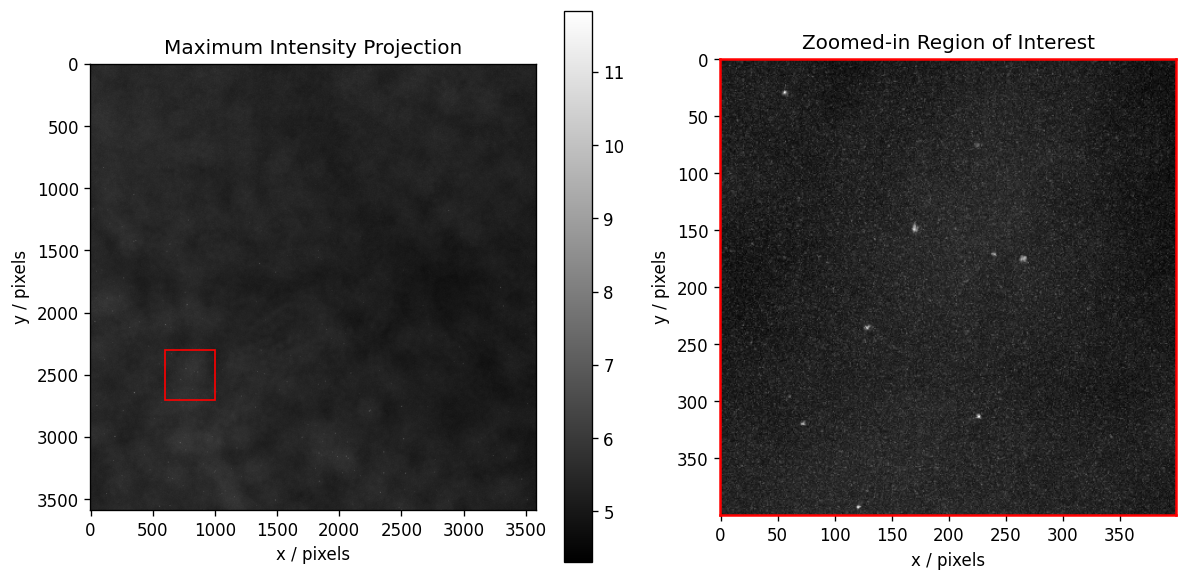

In [4]:
# Define the square region of interest to zoom in on
region_pos_x = 600
region_pos_y = 2300
region_width = 400

# Extract the region of interest from the mip
region_mip = mip[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]

# Plot the full image and the zoomed-in region
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), gridspec_kw={"width_ratios": [0.55, 0.45]}
)

# Image of the entire MIP
im = ax[0].imshow(mip, cmap="gray")
cbar = plt.colorbar(im, ax=ax[0], orientation="vertical")
ax[0].set_title("Maximum Intensity Projection")
ax[0].set_xlabel("x / pixels")
ax[0].set_ylabel("y / pixels")

# box around the region of interest
rect = plt.Rectangle(
    (region_pos_x, region_pos_y),
    region_width,
    region_width,
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
ax[0].add_patch(rect)

ax[1].imshow(region_mip, cmap="gray")
ax[1].set_title("Zoomed-in Region of Interest")
ax[1].set_xlabel("x / pixels")
ax[1].set_ylabel("y / pixels")
# Make the spines of the axes on the zoomed-in region red
for spine in ax[1].spines.values():
    spine.set_edgecolor("red")
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

## Plot of the Scaled MIP (Z-score) values

The Scaled MIP is the best per-pixel cross-correlation values scaled by the mean and variance of all cross-correlation values over the search space.
If we could observe all cross-correlation values (~20 million points in this case), then after normalization each would be distributed $\mathcal{N}(0, 1)$.
However, we only observe the maxima (MIP), and after scaling these z-scores therefore represent how extreme that observation is relative to the background noise.

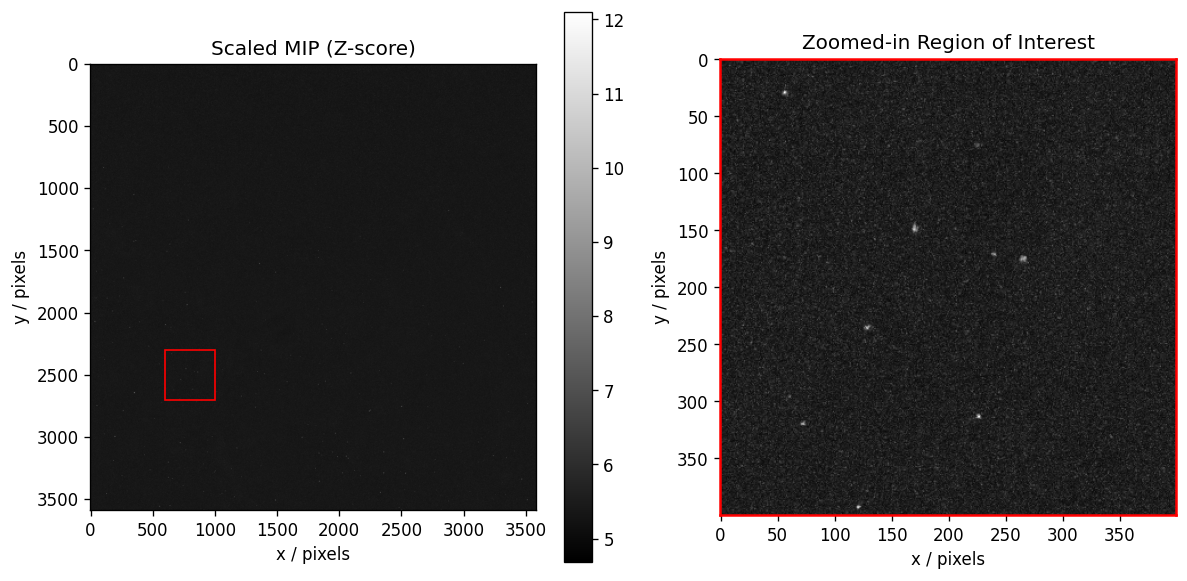

In [5]:
# Define the region of interest to zoom in on
region_pos_x = 600
region_pos_y = 2300
region_width = 400

# Extract the region of interest from the mip
region_scaled_mip = scaled_mip[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]

# Plot the full image and the zoomed-in region
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), gridspec_kw={"width_ratios": [0.55, 0.45]}
)

# Image of the entire MIP
im = ax[0].imshow(scaled_mip, cmap="gray")
cbar = plt.colorbar(im, ax=ax[0], orientation="vertical")
ax[0].set_title("Scaled MIP (Z-score)")
ax[0].set_xlabel("x / pixels")
ax[0].set_ylabel("y / pixels")

# box around the region of interest
rect = plt.Rectangle(
    (region_pos_x, region_pos_y),
    region_width,
    region_width,
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
ax[0].add_patch(rect)

ax[1].imshow(region_scaled_mip, cmap="gray")
ax[1].set_title("Zoomed-in Region of Interest")
ax[1].set_xlabel("x / pixels")
ax[1].set_ylabel("y / pixels")
# Make the spines of the axes on the zoomed-in region red
for spine in ax[1].spines.values():
    spine.set_edgecolor("red")
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

## Histogram of Z-score values

The background z-score values follow a Generalized Extreme Value Distribution, and we can clearly see a shoulder deviating from this distribution starting around a z-score of 7.5 in the following histogram.
Some of these pixels correspond to signal, that is, particles identified in our image.

Note that this histogram is shown on a log-scale.

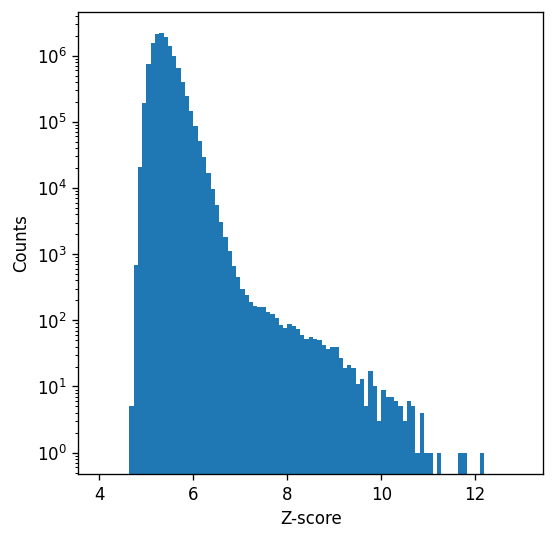

In [6]:
bins = np.linspace(4, 13, 100)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot histogram of the MIP
ax.hist(
    scaled_mip.flatten(),
    bins=bins,
    label="z-score histogram",
    density=False,
)

plt.xlabel("Z-score")
plt.ylabel("Counts")
plt.yscale("log")
plt.show()

## Correlation Mean and Variance

As a brief demonstration, we now show the mean and variance of the cross-correlation values over the 2DTM search space on a per-pixel basis.
These are the "images" used to normalize the MIP into a z-score

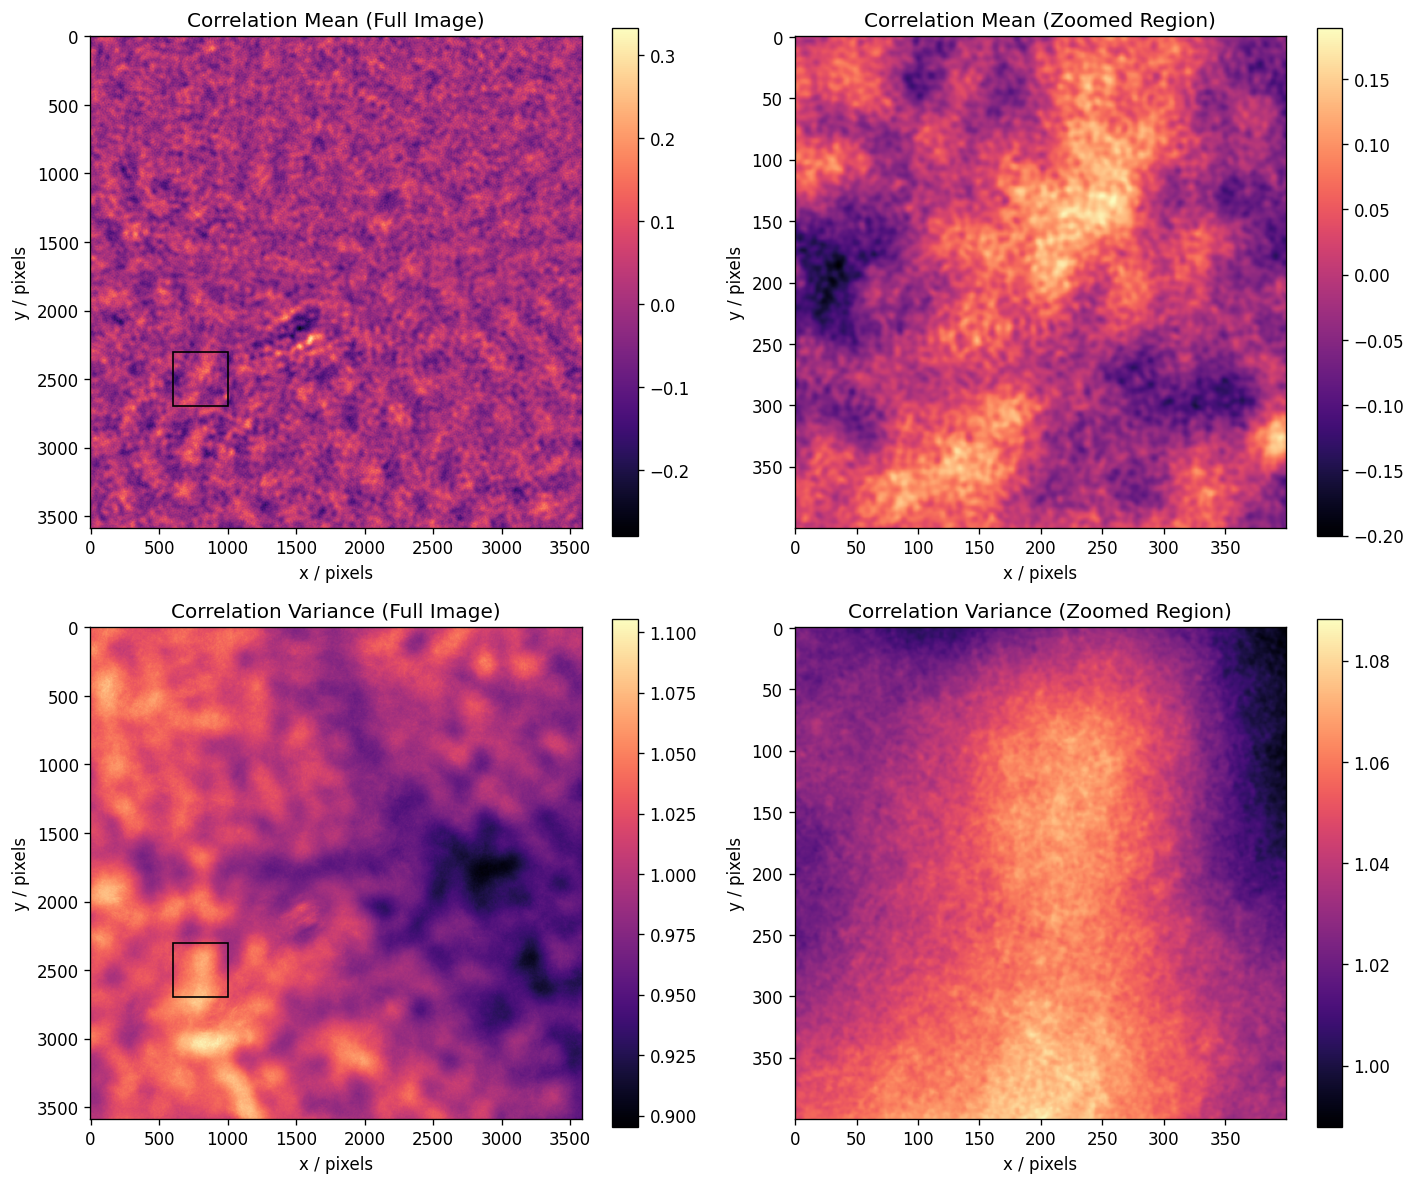

In [7]:
# Define the region of interest to zoom in on
region_correlation_mean = correlation_average[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]
region_correlation_variance = correlation_variance[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]

# Create a 2x2 plot
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
# Add a black box around the region of interest in the full images
rect_mean = plt.Rectangle(
    (region_pos_x, region_pos_y),
    region_width,
    region_width,
    linewidth=1,
    edgecolor="black",
    facecolor="none",
)
ax[0, 0].add_patch(rect_mean)

rect_variance = plt.Rectangle(
    (region_pos_x, region_pos_y),
    region_width,
    region_width,
    linewidth=1,
    edgecolor="black",
    facecolor="none",
)
ax[1, 0].add_patch(rect_variance)
# Plot the full image of correlation mean
im1 = ax[0, 0].imshow(correlation_average, cmap="magma")
cbar1 = plt.colorbar(im1, ax=ax[0, 0], orientation="vertical")
ax[0, 0].set_title("Correlation Mean (Full Image)")
ax[0, 0].set_xlabel("x / pixels")
ax[0, 0].set_ylabel("y / pixels")

# Plot the zoomed-in region of correlation mean
im2 = ax[0, 1].imshow(region_correlation_mean, cmap="magma")
cbar2 = plt.colorbar(im2, ax=ax[0, 1], orientation="vertical")
ax[0, 1].set_title("Correlation Mean (Zoomed Region)")
ax[0, 1].set_xlabel("x / pixels")
ax[0, 1].set_ylabel("y / pixels")

# Plot the full image of correlation variance
im3 = ax[1, 0].imshow(correlation_variance, cmap="magma")
cbar3 = plt.colorbar(im3, ax=ax[1, 0], orientation="vertical")
ax[1, 0].set_title("Correlation Variance (Full Image)")
ax[1, 0].set_xlabel("x / pixels")
ax[1, 0].set_ylabel("y / pixels")

# Plot the zoomed-in region of correlation variance
im4 = ax[1, 1].imshow(region_correlation_variance, cmap="magma")
cbar4 = plt.colorbar(im4, ax=ax[1, 1], orientation="vertical")
ax[1, 1].set_title("Correlation Variance (Zoomed Region)")
ax[1, 1].set_xlabel("x / pixels")
ax[1, 1].set_ylabel("y / pixels")

plt.tight_layout()
plt.show()

## Best orientations represented by color

Here, we take the three Euler angles $(\phi, \theta, \psi)$ defining the best orientation per-pixel and map them to an RGB image to plot the orientation information.
Note that this coloring scheme does not account for the periodic nature of orientation space, and the relative color difference should only be used for visualization purposes.

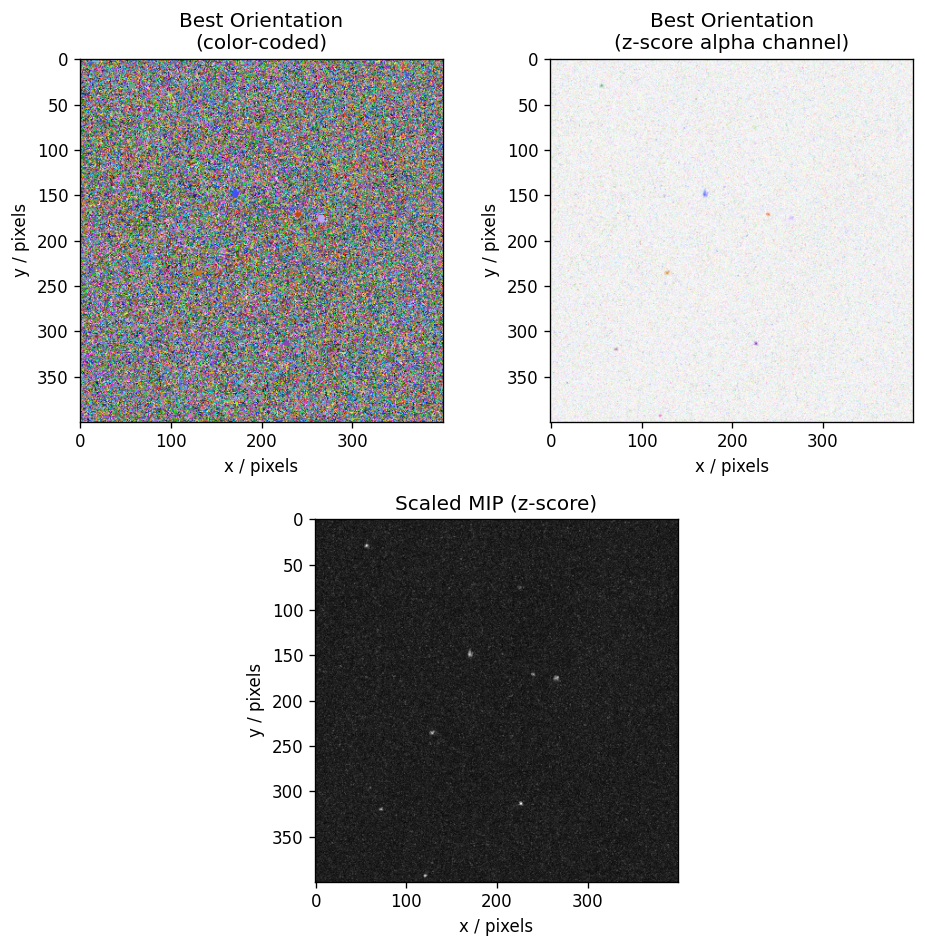

In [ ]:
phi_region = orientation_phi[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]
theta_region = orientation_theta[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]
psi_region = orientation_psi[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]

# Normalize the orientation data to the range [0, 1]
phi_region = phi_region / 360
theta_region = theta_region / 180
psi_region = psi_region / 360
orientation_rgb = np.stack((phi_region, theta_region, psi_region), axis=-1)

# Add alpha channel based on scaled_mip
alpha_channel = scaled_mip[
    region_pos_y : region_pos_y + region_width,
    region_pos_x : region_pos_x + region_width,
]
alpha_channel = (alpha_channel - np.min(alpha_channel)) / (
    np.max(alpha_channel) - np.min(alpha_channel)
)
orientation_rgba = np.zeros(
    (orientation_rgb.shape[0], orientation_rgb.shape[1], 4), dtype=np.float32
)
orientation_rgba[..., :3] = orientation_rgb
orientation_rgba[..., 3] = alpha_channel

# Create a 2 by 2 grid, bottom row spans both columns
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])  # spans both columns


ax0.imshow(orientation_rgb)
ax0.set_title("Best Orientation\n(color-coded)")
ax0.set_xlabel("x / pixels")
ax0.set_ylabel("y / pixels")

ax1.imshow(orientation_rgba)
ax1.set_title("Best Orientation\n(z-score alpha channel)")
ax1.set_xlabel("x / pixels")
ax1.set_ylabel("y / pixels")

ax2.imshow(region_scaled_mip, cmap="gray")
ax2.set_title("Scaled MIP (z-score)")
ax2.set_xlabel("x / pixels")
ax2.set_ylabel("y / pixels")

plt.tight_layout()
plt.show()